<a href="https://colab.research.google.com/github/vishwa18-parikh/AI-HW/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from keras.models import Sequential  # initial NN
from keras.layers import Dense, Dropout # construct each layer
from keras.layers import Convolution2D # swipe across the image by 1
from keras.layers import MaxPooling2D # swipe across by pool size
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from keras.layers import Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(train_images,train_label),(test_images,test_labels)=datasets.mnist.load_data()
train_images,test_images=train_images/255.0,test_images/255.0
train_labels = to_categorical(train_label)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
model=models.Sequential()
# model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(Convolution2D (filters = 64, kernel_size = (4,4),padding = 'Same', 
                         activation ='relu', input_shape = (32,32,1))) 
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1088      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
Total params: 38,016
Trainable params: 38,016
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2984 - accuracy: 0.9155 - val_loss: 0.1749 - val_accuracy: 0.9488
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1459 - accuracy: 0.9572 - val_loss: 0.1280 - val_accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1054 - accuracy: 0.9685 - val_loss: 0.1050 - val_accuracy: 0.9680
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0832 - accuracy: 0.9748 - val_loss: 0.1002 - val_accuracy: 0.9687
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0685 - accuracy: 0.9789 - val_loss: 0.0986 - val_accuracy: 0.9702


313/313 [==============================] - 0s 979us/step - loss: 0.0986 - accuracy: 0.9702


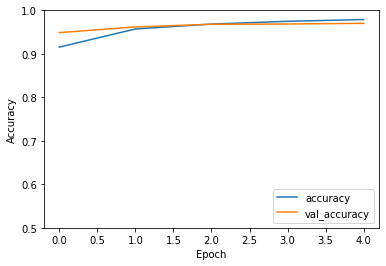

In [ ]:
# plt.plot(history.history['accuracy'], label='accuracy')
# plt.plot(history.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([1,2])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(test_images, test_labels)


plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
print(test_acc)

0.9702000021934509
